# Project: Investigating the No Show Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients showed up for their appointment. A number of characteristics about the patient are included in each row

>● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>
>● ‘Neighborhood’ indicates the location of the hospital.
>
>● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000).
>
>● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question: What factors are important for us to know in order to predict if a patient will not show up for their scheduled appointment?


To answer the above question i will attempt to find the the relationship with how the welfare program, sms reminder affect how the patient keeps up with their appointment, and which gender is more likely to miss an appointment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the data frame we can see that the spelling of some columns are not correct and are in initial caps.                       
Dates in the scheduled day and appointment day column are not properly formatted.                                     
The No-show column is kinda tricky, we will on it to make very straight forward.

>**Note:** In the No-show column __*no*__ means the person did not miss the appointment
__*yes*__ means the person missed the appointment

Check the genral information about the data set like the data types, num of rows and colums, duplicates and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above table we see that they are no missing values in any of the columns. Next we will check for duplicates values.

In [4]:
df.duplicated().sum()

0

Let examine the structure of the entire data and the summary statistics 

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary statistics we see that the min age is -1 , since the is no age as -1 that will be part of our cleaning process.  
Finally let have a picture of how the shape of our data looks like.

In [6]:
df.shape

(110527, 14)

# Cleaning the Dataset

let fix the data type for the ScheduledDay and AppointmentDay by converting it to date time format

In [7]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'], utc=True)
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'], utc=True)

let confirm if the data type has changed

In [8]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Fix the spelling of the column names and change the no-show column to kept_appointment

In [9]:
df.rename(columns={'ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day','Hipertension':'hypertension','Handcap':'handicap','No-show':'kept_appointment'}, inplace=True)

let confirm if the columns names are fixed

In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'scheduled_day',
       'appointment_day', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Alcoholism', 'handicap', 'SMS_received',
       'kept_appointment'],
      dtype='object')

change all the column name to lower case and replace id with _id

In [11]:
df.rename(columns=lambda x : x.lower().replace('id','_id'), inplace=True)

check if the edits are implemented

In [12]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'kept_appointment'],
      dtype='object')

### Let fix the kept appointment column for easy understanding by changing the No to 1 and yes to 0.

first we split the data set in two based on the kept appointment column

We get the data set for those that kept their appointment

In [13]:
positive_appointment = df.query('kept_appointment == "No"')

let confirm that we have the data of only those that kept the appointment

In [14]:
positive_appointment['kept_appointment'].unique()

array(['No'], dtype=object)

let convert the No to 1.                       
first we create a copy of the positive appointment data set   
Then we change the No value in the kept appointment column of the copied data set  to 1.

In [15]:
convert_positive_appointment = positive_appointment.copy()
convert_positive_appointment['kept_appointment'] = convert_positive_appointment['kept_appointment'].str.replace('No','1')

We confirm the changes have been implemented

In [16]:
convert_positive_appointment['kept_appointment'].unique()

array(['1'], dtype=object)

Next we get the data set of those that missed their appointment

In [17]:
negative_appointment = df.query('kept_appointment == "Yes"')

let confirm that we have the data of only those that missed their appointment

In [18]:
negative_appointment['kept_appointment'].unique()

array(['Yes'], dtype=object)

let convert the Yes to 0.                       
first we create a copy of the negative appointment data set   
Then we change the yes value in the kept appointment column of the copied data set  to 0.

In [19]:
convert_negative_appointment = negative_appointment.copy()
convert_negative_appointment['kept_appointment'] = convert_negative_appointment['kept_appointment'].str.replace('Yes','0')

We confirm the changes have been implemented

In [20]:
convert_negative_appointment['kept_appointment'].unique()

array(['0'], dtype=object)

Let append convert_positive_appointment and convert_negative_appointment to get a new data set that the kept appointment column has been fixed

In [21]:
converted_appointment = pd.concat([convert_positive_appointment,convert_negative_appointment])

We check our new data sset

In [22]:
converted_appointment.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,kept_appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


Since we have changed the kept appointment column values from Yes and No to 0 and 1 respectively, we also have to change the data type from string to integer.

In [23]:
converted_appointment['kept_appointment'] = converted_appointment['kept_appointment'].astype(int)

### Let fix the Gender column for easy understanding by changing the M to 1 and F to 0.

first we split the data set in two based on the gender column

In [24]:
gender_male = converted_appointment.query('gender == "M"')

let confirm that we have the data of only male

In [25]:
gender_male['gender'].unique()

array(['M'], dtype=object)

let convert M to 1.                       
first we create a copy of the gender_male data set   
Then we change the M value in the gender column of the copied data set  to 1.

In [26]:
convert_gender_male= gender_male.copy()
convert_gender_male['gender'] = convert_gender_male['gender'].str.replace('M','1')

Let confirm the changes

In [27]:
convert_gender_male['gender'].unique()

array(['1'], dtype=object)

Next we get the data set of only female

In [28]:
gender_female = converted_appointment.query('gender == "F"')

let confirm that we have the data of only female

In [29]:
gender_female['gender'].unique()

array(['F'], dtype=object)

let convert the F to 0.                       
first we create a copy of the gender_female data set   
Then we change the F value in the gender column of the copied data set  to 0.

In [30]:
convert_gender_female = gender_female.copy()
convert_gender_female['gender'] = convert_gender_female['gender'].str.replace('F','0')

Let confirm the changes

In [31]:
convert_gender_female['gender'].unique()

array(['0'], dtype=object)

Let append convert_gender_male and convert_gender_female to get a new data set that the gender column has been fixed

In [32]:
clean_data = pd.concat([convert_gender_male,convert_gender_female])

Since we have changed the gender column values from F and M to 0 and 1 respectively, we also have to change the data type from string to integer.

In [33]:
clean_data['gender'] = clean_data['gender'].astype(int)

Let confirm the changes in the data type

In [34]:
clean_data.dtypes

patient_id                      float64
appointment_id                    int64
gender                            int32
scheduled_day       datetime64[ns, UTC]
appointment_day     datetime64[ns, UTC]
age                               int64
neighbourhood                    object
scholarship                       int64
hypertension                      int64
diabetes                          int64
alcoholism                        int64
handicap                          int64
sms_received                      int64
kept_appointment                  int32
dtype: object

Let get the row of data that had age as - 1 and drop it since there is no actual age as -1

In [35]:
clean_data.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,kept_appointment
99832,4.659432e+14,5775010,0,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [36]:
clean_data.drop(index = 99832, inplace=True)

let look at the summary statistics of our new data set

In [37]:
clean_data.describe()

,patient_id,appointment_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,kept_appointment
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,7.129544e+04,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


We can see that the minimum age is no longer -1

### Let view our now cleaned data

In [38]:
clean_data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,kept_appointment
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
13,9.113946e+14,5636249,1,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,1
16,8.457439e+13,5633121,1,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,1
25,5.819370e+12,5624020,1,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,1
28,5.926172e+12,5642400,1,2016-04-29 15:48:02+00:00,2016-04-29 00:00:00+00:00,51,SÃO PEDRO,0,0,0,0,0,0,1


In [39]:
clean_data.scheduled_day.max()

Timestamp('2016-06-08 20:07:23+0000', tz='UTC')

In [40]:
clean_data.scheduled_day.min()

Timestamp('2015-11-10 07:13:56+0000', tz='UTC')

In [41]:
clean_data.appointment_day.min()

Timestamp('2016-04-29 00:00:00+0000', tz='UTC')

In [42]:
clean_data.appointment_day.max()

Timestamp('2016-06-08 00:00:00+0000', tz='UTC')

<a id='eda'></a>
## Exploratory Data Analysis


let see the distribution of dataset

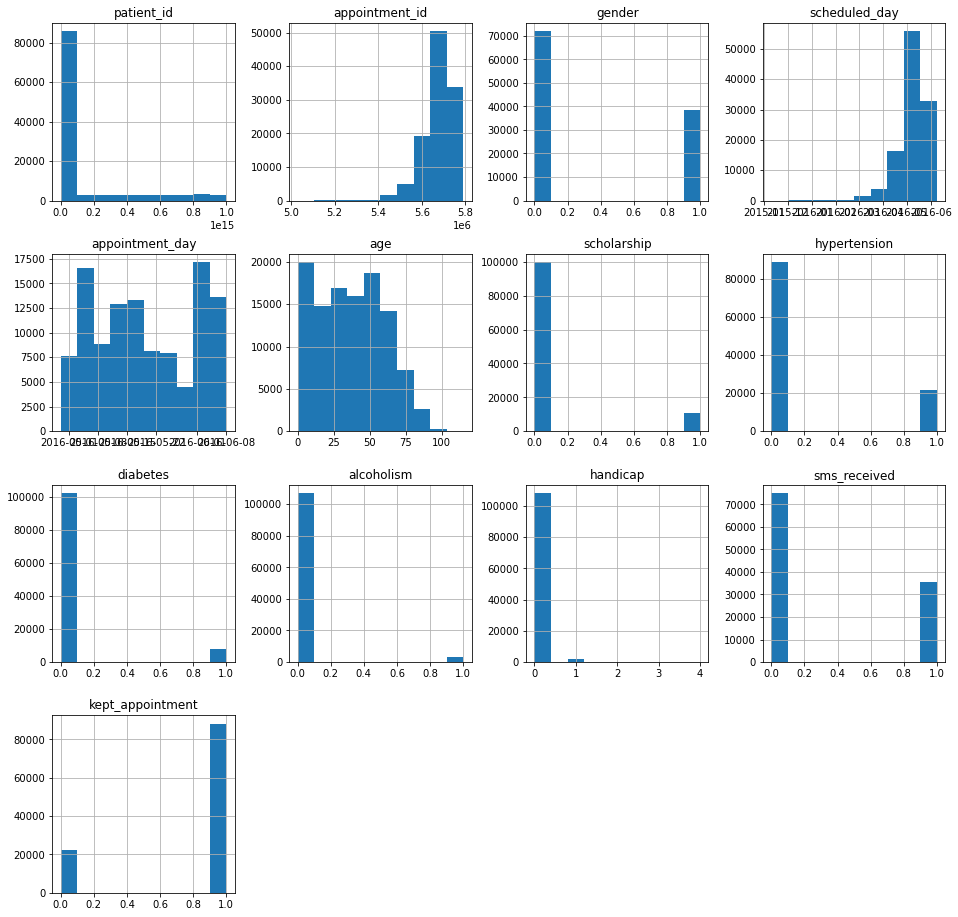

In [43]:
clean_data.hist(figsize=(16,16));

let get those that kept appointment and those that didnt keep appointment 

In [44]:
yes_appointment = clean_data.kept_appointment == True
no_appointment = clean_data.kept_appointment  == False

let see the average appointment kept and missed appointment

In [45]:
yes_appointment.mean()*100

79.80656135208005

In [46]:
no_appointment.mean()*100

20.193438647919944

From the above result we can see that about 79.8% kept their appointment and about 20.2% didnt keep their appointment. 

let explore what factor made the remaining people from keeping their appointment

##### let see how sms reminder affect keeping to appointment

let get the number of those that got sms and those that didnt get sms

In [47]:
clean_data['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

75045 of the patient didnt get an sms reminder while only 35482 of the patient got sms remimders

let see the percentage of people that got sms

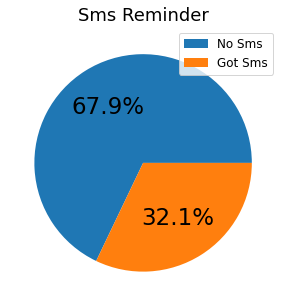

In [48]:
ind12 =clean_data.sms_received.value_counts().index
sms_chart = clean_data.sms_received.value_counts()[ind12].plot(kind='pie',autopct='%1.1f%%',ylabel='',fontsize=23, labeldistance=None,  figsize = (5,5))
X = ['No Sms', 'Got Sms']
sms_chart.legend(loc='upper right')
plt.title('Sms Reminder',fontsize=18)
sms_chart.legend(X,fontsize=12);

The pie chart show that 67.9% of the patient didnt get sms reminders

let see how many male and female didnt get sms

In [49]:
clean_data.groupby(['sms_received'])['gender'].value_counts()

sms_received  gender
0             0         47637
              1         27407
1             0         24202
              1         11280
Name: gender, dtype: int64

47637 females didnt get sms reminder   
27407 male didnt get sms reminder

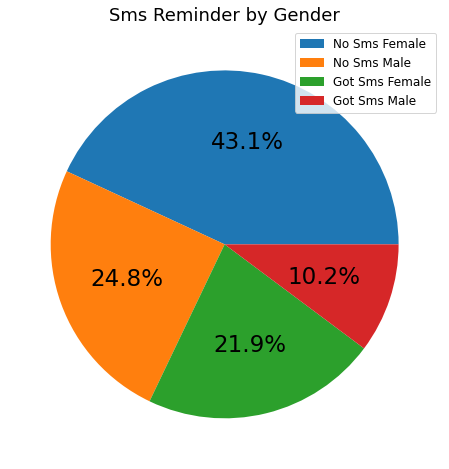

In [50]:
ind12 =clean_data.groupby(['sms_received'])['gender'].value_counts().index
clean_data.groupby(['sms_received'])['gender'].value_counts()[ind12].plot(kind='pie',autopct='%1.1f%%',ylabel='',fontsize=23, labeldistance=None,  figsize = (8,8))
X = ['No Sms Female', 'No Sms Male','Got Sms Female','Got Sms Male']
plt.legend(loc='upper right')
plt.title('Sms Reminder by Gender',fontsize=18)
plt.legend(X,fontsize=12);

The pie chart show that:  
43.1% of the patient didnt get sms reminders were females  
24.8% of the patient didnt get sms reminders were males   
21.9% of the patient that got sms reminders were females  
10.2% of the patient that got sms reminders were males 


Let see the number of people who didnt get sms reminder based on the welfare program

In [51]:
clean_data.groupby(['sms_received'])['scholarship'].value_counts()

sms_received  scholarship
0             0              67688
              1               7356
1             0              31977
              1               3505
Name: scholarship, dtype: int64

67688 patient who are not on the welfare program didnt get sms reminders  
7356 patient who are on the welfare program got sms reminder

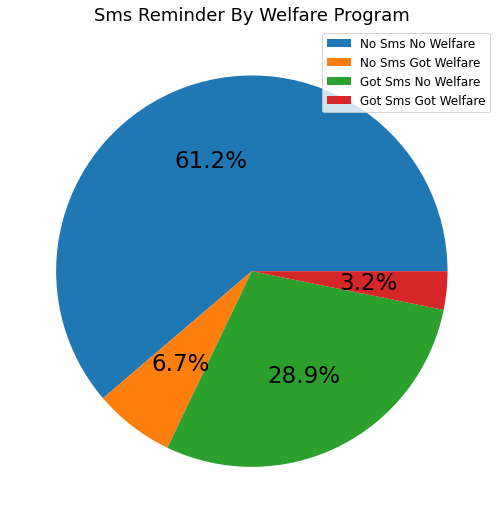

In [52]:
ind12 =clean_data.groupby(['sms_received'])['scholarship'].value_counts().index
clean_data.groupby(['sms_received'])['scholarship'].value_counts()[ind12].plot(kind='pie',autopct='%1.1f%%',ylabel='',fontsize=23, labeldistance=None,  figsize = (9,9))
X = ['No Sms No Welfare', 'No Sms Got Welfare','Got Sms No Welfare', 'Got Sms Got Welfare']
plt.legend(loc='upper right')
plt.title('Sms Reminder By Welfare Program',fontsize=18)
plt.legend(X,fontsize=12);

The pie chart show that:  
61.2% of the patient didnt get sms reminders were not on the welfare program  
6.7% of the patient didnt get sms reminders were on the welfare program   
28.9% of the patient that got sms reminders were not on the welfare program  
3.2% of the patient that got sms reminders were on the welfare program

In [53]:
clean_data.groupby('sms_received')[['kept_appointment']].value_counts()

sms_received  kept_appointment
0             1                   62509
              0                   12535
1             1                   25698
              0                    9784
dtype: int64

From the above table we see that 12535 out of 75045 of those that didnt get sms reminders missed their appointment      
9784 out of 35482 that got sms reminders also missed their appointment

let get the average of those that kept appointment when the get sms and when the dont 

In [54]:
clean_data.groupby('sms_received')['kept_appointment'].mean()

sms_received
0    0.832965
1    0.724255
Name: kept_appointment, dtype: float64

we see that those who didnt get sms and kept their appointment has an average of 0.832967 which is more that those that got sms and kept their appointment.  
Let look at this distribution

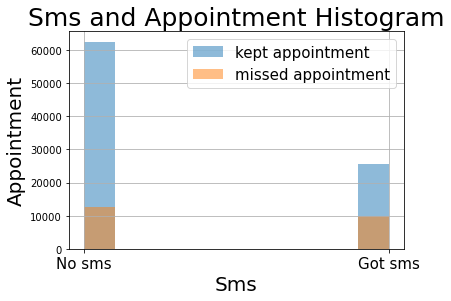

In [55]:
clean_data.sms_received[yes_appointment].hist(alpha = 0.5, label = 'kept appointment',)
clean_data.sms_received[no_appointment].hist(alpha = 0.5,  label = 'missed appointment')
plt.xticks([0,1],['No sms','Got sms'],fontsize=15);
plt.title('Sms and Appointment Histogram',fontsize=25)
plt.ylabel('Appointment',fontsize=20)
plt.xlabel('Sms',fontsize=20)
plt.legend(fontsize=15);

The histogram show that 62510 patients didnt get sms but kept their appoint and 12535 of thosse that didnt get sms missed their appointment.  
while 25698 of the patient who got sms reminder kept their appointment and 9784 of those who got sms didnt keep their appointment

Let plot a bar chart of missed appointment per sms to have a clearer visuals

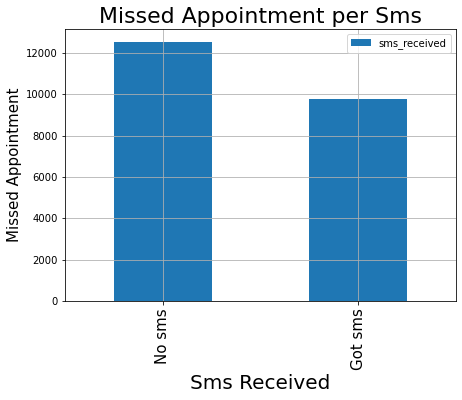

In [56]:
clean_data.sms_received[no_appointment].value_counts().plot(kind='bar', figsize = (7,5), grid = True);
plt.title('Missed Appointment per Sms',fontsize=22)
plt.ylabel('Missed Appointment', fontsize=15)
plt.xticks([0,1],['No sms','Got sms'],fontsize=15);
plt.legend()
plt.xlabel('Sms Received', fontsize=20);

The bar chart shows that 12535 missed their appointment when they didnt get sms reminder

In [57]:
ind1 = clean_data.sms_received[no_appointment].value_counts().index 

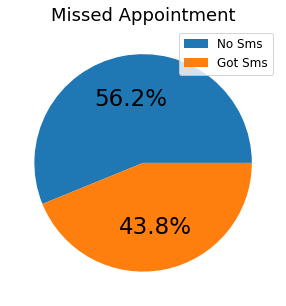

In [58]:
no_appointment_chart = clean_data.sms_received[no_appointment].value_counts()[ind1].plot(kind='pie',autopct='%1.1f%%',ylabel='',fontsize=23, labeldistance=None,  figsize = (5,5))
X = ['No Sms', 'Got Sms']
no_appointment_chart.legend(loc='upper right')
plt.title('Missed Appointment',fontsize=18)
no_appointment_chart.legend(X,fontsize=12);

The pie chart shows us that 56.2% of those who didnt get sms missed their appointment

customization of the pie chart could be found [here](https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend)

##### let see how the welfare program affect keeping to appointment

let get the number of those that are on the welfare program and those that are not

In [59]:
clean_data.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

10861 patient are on the welfare program and 99666 patient are not

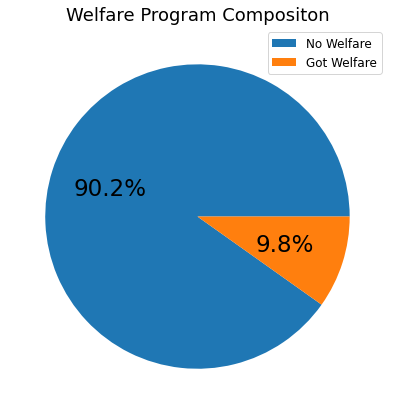

In [60]:
ind12 =clean_data.scholarship.value_counts().index
scholarship_chart = clean_data.scholarship.value_counts()[ind12].plot(kind='pie',autopct='%1.1f%%',ylabel='',fontsize=23, labeldistance=None,  figsize = (7,7))
X = ['No Welfare', 'Got Welfare']
scholarship_chart.legend(loc='upper right')
plt.title('Welfare Program Compositon',fontsize=18)
scholarship_chart.legend(X,fontsize=12);

Pie chart show that 90.2% of the patient are not on the welfare program

In [61]:
clean_data.groupby('scholarship')['kept_appointment'].value_counts()

scholarship  kept_appointment
0            1                   79924
             0                   19741
1            1                    8283
             0                    2578
Name: kept_appointment, dtype: int64

We can see that 19741 patient that are not on the welfare program missed their appointment while just 2578 that are on the welfare programm missed their appointment

let look at the distribution of the welfare programm with keeping to appointment

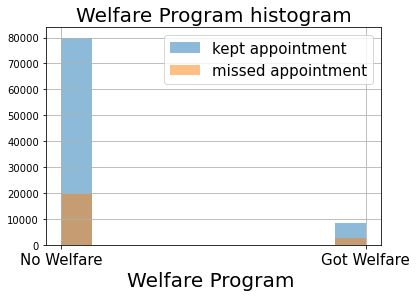

In [62]:
clean_data.scholarship[yes_appointment].hist(alpha = 0.5, label = 'kept appointment',)
clean_data.scholarship[no_appointment].hist(alpha = 0.5,  label = 'missed appointment')
plt.xticks([0,1],['No Welfare','Got Welfare'],fontsize=15);
plt.title('Welfare Program histogram',fontsize=20)
plt.xlabel('Welfare Program ',fontsize=20)
plt.legend(fontsize=15);

The histogram show that 79925 patients who are not on the welfare program kept their appoint and 19741 of thosse that are not on the welfare programm missed their appointment.  
while 8283 of the patient on the welfare program kept their appointment and 2578 of those who are on the welfare program didnt keep their appointment

from the above analysis we can see that those that are on the welfare program are more likely going to keep their appointment

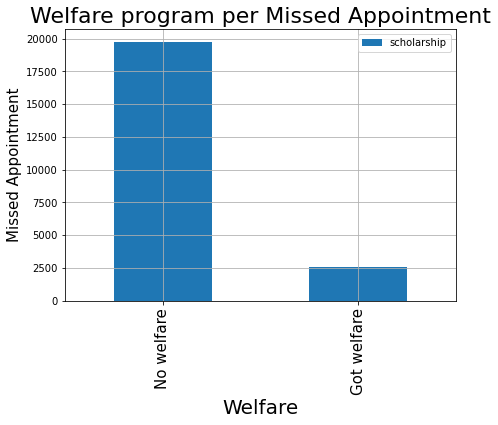

In [63]:
clean_data.scholarship[no_appointment].value_counts().plot(kind='bar', figsize = (7,5), grid = True);
plt.title('Welfare program per Missed Appointment',fontsize=22)
plt.ylabel('Missed Appointment', fontsize=15)
plt.xlabel('Welfare', fontsize=20)
plt.xticks([0,1],['No welfare','Got welfare'],fontsize=15);
plt.legend();


let see the percentage of patient that missed their appointment that are on the welfare programm and those that are not on the welfare programm

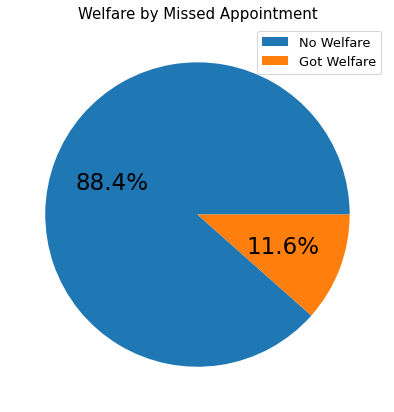

In [64]:
ind2 = clean_data.scholarship[no_appointment].value_counts().index
no_scholarship_chart = clean_data.scholarship[no_appointment].value_counts()[ind2].plot(kind='pie',autopct='%1.1f%%',ylabel='', labeldistance=None,fontsize=23,  figsize = (7,7))
X = ['No Welfare', 'Got Welfare']
no_scholarship_chart.legend(loc='upper right')
plt.title('Welfare by Missed Appointment',fontsize=15)
no_scholarship_chart.legend(X,fontsize=13);

The pie chart show that 88.4% of patient who where not on the welfare programm missed theit appointment

##### let see how each gender affect keeping to appointment

In [65]:
clean_data.gender.value_counts()

0    71839
1    38687
Name: gender, dtype: int64

The total number of females where 71839 while the male where 38687

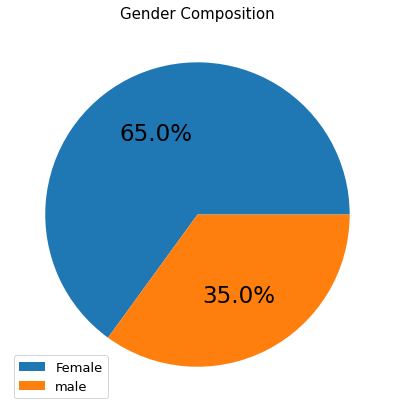

In [66]:
ind12 = clean_data.gender.value_counts().index
gender_chart = clean_data.gender.value_counts()[ind12].plot(kind='pie',autopct='%1.1f%%',ylabel='', labeldistance=None,fontsize=23,  figsize = (7,7))
X = ['Female', 'male']
gender_chart.legend(loc='upper right')
plt.title('Gender Composition',fontsize=15)
gender_chart.legend(X,fontsize=13);

Pie chart shows that 65% of the patients where females

In [67]:
clean_data.groupby('gender')['kept_appointment'].value_counts()

gender  kept_appointment
0       1                   57245
        0                   14594
1       1                   30962
        0                    7725
Name: kept_appointment, dtype: int64

We can see that 14594 of the female patients missed their appointment while 7725 male patient missed their appointment

Let take a look at their distribution

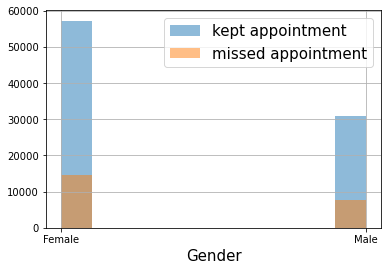

In [68]:
clean_data.gender[yes_appointment].hist(alpha = 0.5,  label = 'kept appointment',)
clean_data.gender[no_appointment].hist(alpha = 0.5,  label = 'missed appointment', )
plt.xticks([0,1],['Female','Male']);
plt.xlabel('Gender',fontsize=15)
plt.legend(fontsize=15);

from the distribtion we see that females misses appointment more than men

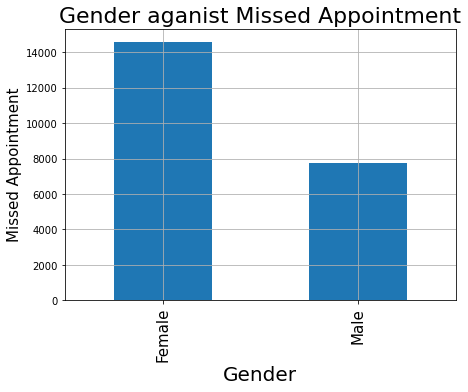

In [69]:
clean_data.gender[no_appointment].value_counts().plot(kind='bar', figsize = (7,5), grid = True);
plt.title('Gender aganist Missed Appointment',fontsize=22)
plt.ylabel('Missed Appointment', fontsize=15)
plt.xlabel('Gender', fontsize=20)
plt.xticks([0,1],['Female','Male'],fontsize=15);

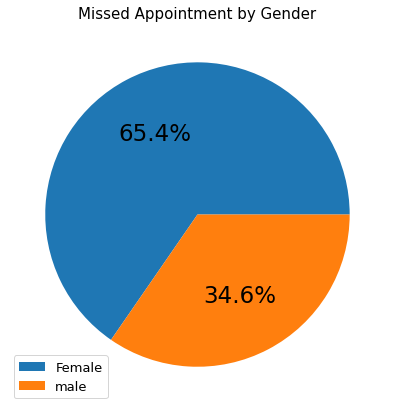

In [70]:
ind12 = clean_data.gender[no_appointment].value_counts().index
gender_missed_appointment_chart = clean_data.gender[no_appointment].value_counts()[ind12].plot(kind='pie', autopct ='%1.1f%%',ylabel='',labeldistance=None,fontsize=23,  figsize = (7,7))
X = ['Female', 'male']
gender_missed_appointment_chart.legend(loc='upper right');
plt.title('Missed Appointment by Gender',fontsize=15);
gender_missed_appointment_chart.legend(X,fontsize=13);

The pie chart shows that 65.4% of patients that missed appointment where females

#### let see how the welfare program and sms affecting not keeping appointment

let get the data set of those not keeping to appointment

In [71]:
missed_appointment = clean_data.query('kept_appointment == 0')

In [72]:
missed_appointment.kept_appointment.value_counts()

0    22319
Name: kept_appointment, dtype: int64

22319 patient missed their appointment

In [73]:
clean_data.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

99665 patient where not on the welfare program  
10861 patient where on the welfare program

In [74]:
ind12 =clean_data.scholarship.value_counts().index

In [75]:
missed_appointment.groupby(['scholarship','sms_received']).kept_appointment.value_counts()

scholarship  sms_received  kept_appointment
0            0             0                   11141
             1             0                    8600
1            0             0                    1394
             1             0                    1184
Name: kept_appointment, dtype: int64

11141 patient who are not on the welfare program and didnt receive sms reminders missed their appointment.  
8600 patient who are not on the welfare program and got sms reminder missed their appointment.  
1394 patient who are on the welfare program but did not get sms reminder missed their appointment.  
1184 patient who are on the welfare program but gott sms reminder missed their appointment.

Lets look at this visually

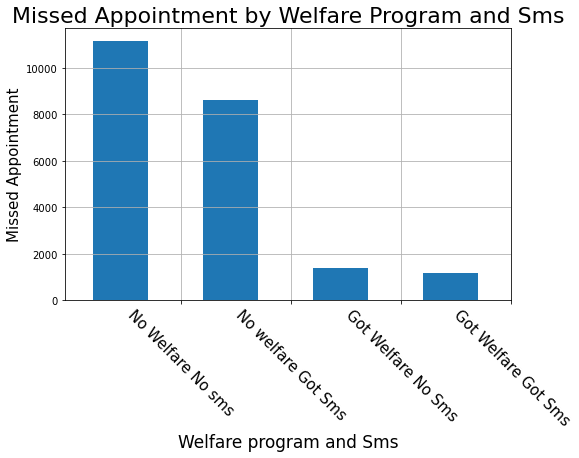

In [76]:
missed_appointment.groupby(['scholarship','sms_received']).kept_appointment.value_counts().plot(kind='bar', figsize = (8,5),grid=True)
plt.title('Missed Appointment by Welfare Program and Sms',fontsize=22)
plt.xlabel('Welfare program and Sms',fontsize=17)
plt.ylabel('Missed Appointment', fontsize=15)
plt.xticks([0.55,1.55,2.55,3.55],['No Welfare No sms','No welfare Got Sms','Got Welfare No Sms','Got Welfare Got Sms'],fontsize=15, rotation=-45);

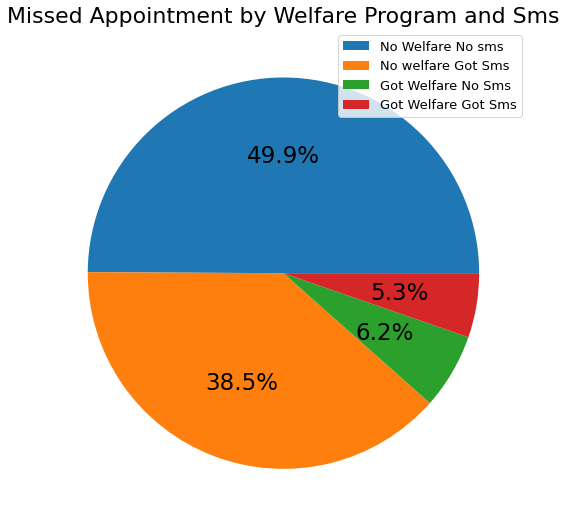

In [77]:
ind12 = missed_appointment.groupby(['scholarship','sms_received']).kept_appointment.value_counts().index
missed_appointment.groupby(['scholarship','sms_received']).kept_appointment.value_counts()[ind12].plot(kind='pie',autopct ='%1.1f%%',ylabel='',labeldistance=None,fontsize=23,  figsize = (9,9))
X = ['No Welfare No sms','No welfare Got Sms','Got Welfare No Sms','Got Welfare Got Sms']
plt.legend(loc='upper right');
plt.title('Missed Appointment by Welfare Program and Sms',fontsize=22)
plt.legend(X,fontsize=13);

Pie chart shows that:  
49.9% patient who are not on the welfare program and didnt receive sms reminders missed their appointment.  
38.5% patient who are not on the welfare program and got sms reminder missed their appointment.  
6.2% patient who are on the welfare program but did not get sms reminder missed their appointment.  
5.3% patient who are on the welfare program but gott sms reminder missed their appointment.

#### let see how the welfare program and Gender affecting not keeping appointment

In [78]:
missed_appointment.groupby(['scholarship','gender']).kept_appointment.value_counts()

scholarship  gender  kept_appointment
0            0       0                   12488
             1       0                    7253
1            0       0                    2106
             1       0                     472
Name: kept_appointment, dtype: int64

12488 patient who are not on the welfare program and are females missed their appointment.  
7253 patient who are not on the welfare program and are males missed their appointment.  
2106 patient who are on the welfare program and are females missed their appointment.  
472 patient who are on the welfare program and are males missed their appointment.

Lets look at this visually

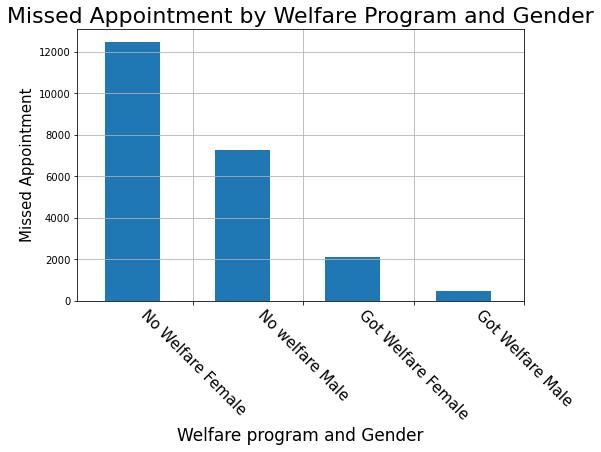

In [79]:
missed_appointment.groupby(['scholarship','gender']).kept_appointment.value_counts().plot(kind='bar', figsize = (8,5),grid=True)
plt.title('Missed Appointment by Welfare Program and Gender',fontsize=22)
plt.xlabel('Welfare program and Gender',fontsize=17)
plt.ylabel('Missed Appointment', fontsize=15)
plt.xticks([0.55,1.55,2.55,3.55],['No Welfare Female','No welfare Male','Got Welfare Female','Got Welfare Male'],fontsize=15, rotation=-45);

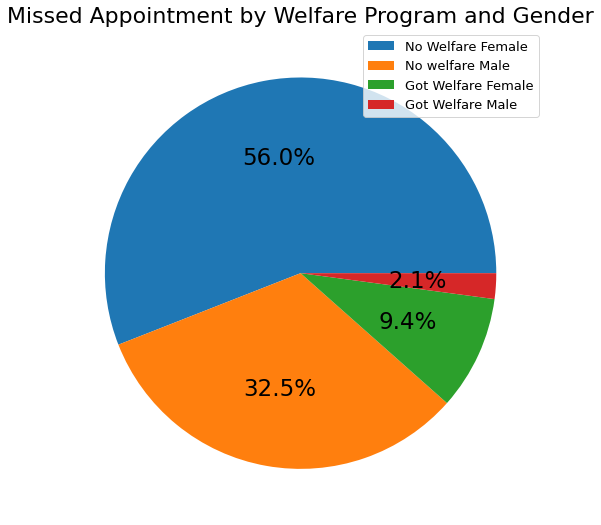

In [80]:
ind12 = missed_appointment.groupby(['scholarship','gender']).kept_appointment.value_counts().index
missed_appointment.groupby(['scholarship','gender']).kept_appointment.value_counts()[ind12].plot(kind='pie',autopct ='%1.1f%%',ylabel='',labeldistance=None,fontsize=23,  figsize = (9,9))
X = ['No Welfare Female','No welfare Male','Got Welfare Female','Got Welfare Male']
plt.legend(loc='upper right');
plt.title('Missed Appointment by Welfare Program and Gender',fontsize=22)
plt.legend(X,fontsize=13);

Pie chart shows that:  
56% patient who are not on the welfare program and are females missed their appointment.  
32.5% patient who are not on the welfare program and are males missed missed their appointment.  
9.4% patient who are on the welfare program and are females missed missed their appointment.  
2.1% patient who are on the welfare program and are males missed missed their appointment.

<a id='conclusions'></a>
## Conclusions


The data set collects information from 100k medical appointments in Brazil and is focused on what factor affect a patient from show up for their appointment.

<b>observations:</b>

1. Minority of the people (<b>20.2%</b>) did not show up for their appointment

2. <b>75045</b> of the patient didnt get an sms reminder. This makes up <b>67.9%</b> of the total patient

3. <b>65%</b> of the people (<b>71839</b>) where females and <b>35%</b> of the people (<b>38687</b>) where male

4. <b>47637</b> females didnt get sms reminder and <b>27407</b> male didnt get sms reminder. Which means that <b>43.1%</b> females didnt get sms reminder and <b>24.8%</b> male did not get sms reminder

5. Majority of the people (<b>90.2%</b>) are not on the welfare program

6. <b>67688</b> patient who are not on the welfare program didnt get sms reminders <b>7356</b> patient who are on the welfare program got sms reminder. which means that <b>61.2%</b> of the patient who were not on the welfare program didnt get sms reminders and <b>6.7%</b> of the patient who were on the welfare program  didnt get sms reminders 

7. <b>12535</b> people who missed their appointment didnt get sms reminder and <b>9784</b>  people who got sms missed keep their appointment. This makes up <b>56.2%</b> and <b>43.8</b> respectively

8. <b>88.4%</b> of the people (<b>19741</b>) that are not on the welfare program missed their appointment and <b>11.6%</b> of the people (<b>2578</b>) that are on the welfare programm missed their appointment

7. <b>65.4%</b> of the females missed their appointmnet  

8. <b>49.9%</b> of the people (<b>11141</b>) who are not on the welfare program and didnt receive sms reminders missed their appointment.  
<b>38.5%</b> of the people (<b>8600</b>) who are not on the welfare program and got sms reminder missed their appointment.  
<b>6.2%</b> of the people (<b>1394</b>) who are on the welfare program but did not get sms reminder missed their appointment.  
<b>5.3%</b> of the people (<b>1184</b>) who are on the welfare program but gott sms reminder missed their appointment.

9. <b>56%</b> of the people (<b>12488</b>) who are not on the welfare program and are females missed their appointment.  
<b>32.5%</b> of the people (<b>7253</b>) who are not on the welfare program and are males missed missed their appointment.  
<b>9.4%</b> of the people (<b>2106</b>) who are on the welfare program and are females missed missed their appointment.  
<b>2.1%</b> of the people (<b>472</b>) who are on the welfare program and are males missed missed their appointment.

We believe female patient who are not on the welfare program represent a higher risk group of people not to show up for their appointment.

<a id='limitations'></a>
## Limitations:

1. More Females than Males in the data set

2. Unrealistic age record (age = -1)

3. Data set was based on appointment for just two months

4. Further analysis can be carried out